In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import scipy.odr as odr
plt.rcParams['figure.figsize'] = [30, 15]

Bin size: 5.025129999999949e-11
Bin Count = 399
Minimum count of the raw data: 0.861784


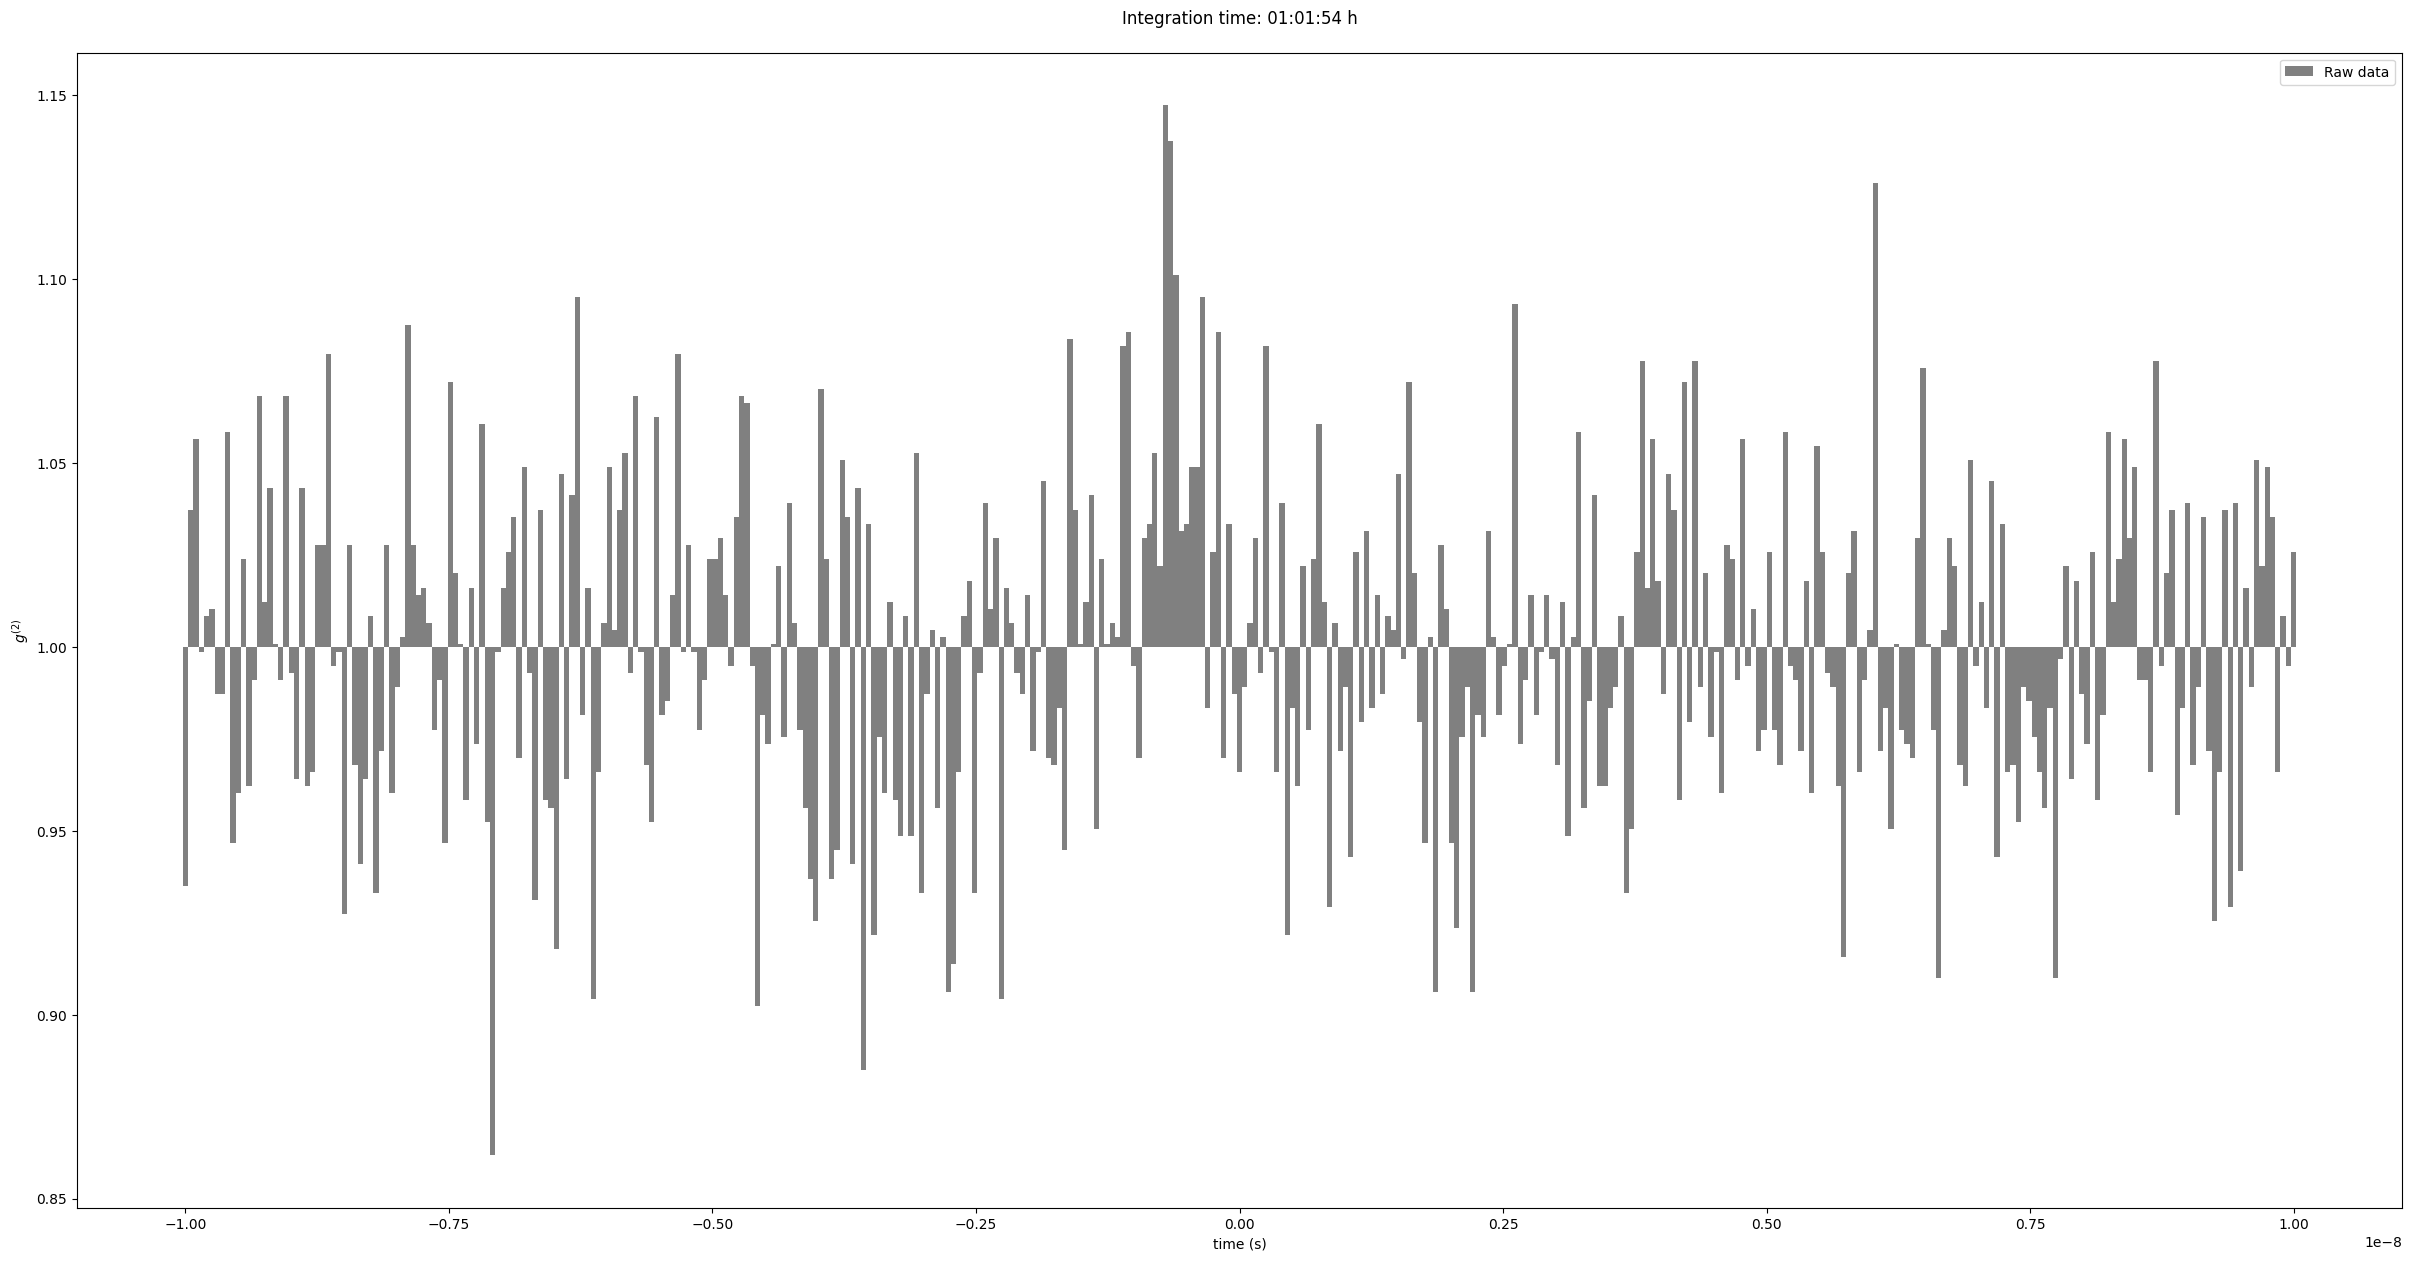

In [15]:
%matplotlib inline
# Skip the comment lines starting with '#' and read the data
g2dataset = pd.read_csv(r"Experiment 2\G2Functions_0.txt", comment='#', sep=';', header=None, names=["T", "G2"])
g2dataset = g2dataset.to_numpy().T
# Get integration time
with open(r"Experiment 2\G2Functions_0.txt") as f:
    lines = f.readlines()
    integration_time = lines[5][17:]
plt.title(f"Integration time: {integration_time}")

T = g2dataset[0]
g2 = g2dataset[1]
print(f"Bin size: {T[1] - T[0]}")
print(f"Bin Count = {len(T)}")

plt.bar(T, g2-1, T[1] - T[0], bottom=1, label="Raw data", color="grey")

print(f"Minimum count of the raw data: {min(g2)}")

plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()

Just noise for the first run

Bin size: 3.01508000000002e-11
Bin Count = 399
Minimum count of the raw data: 0.870118


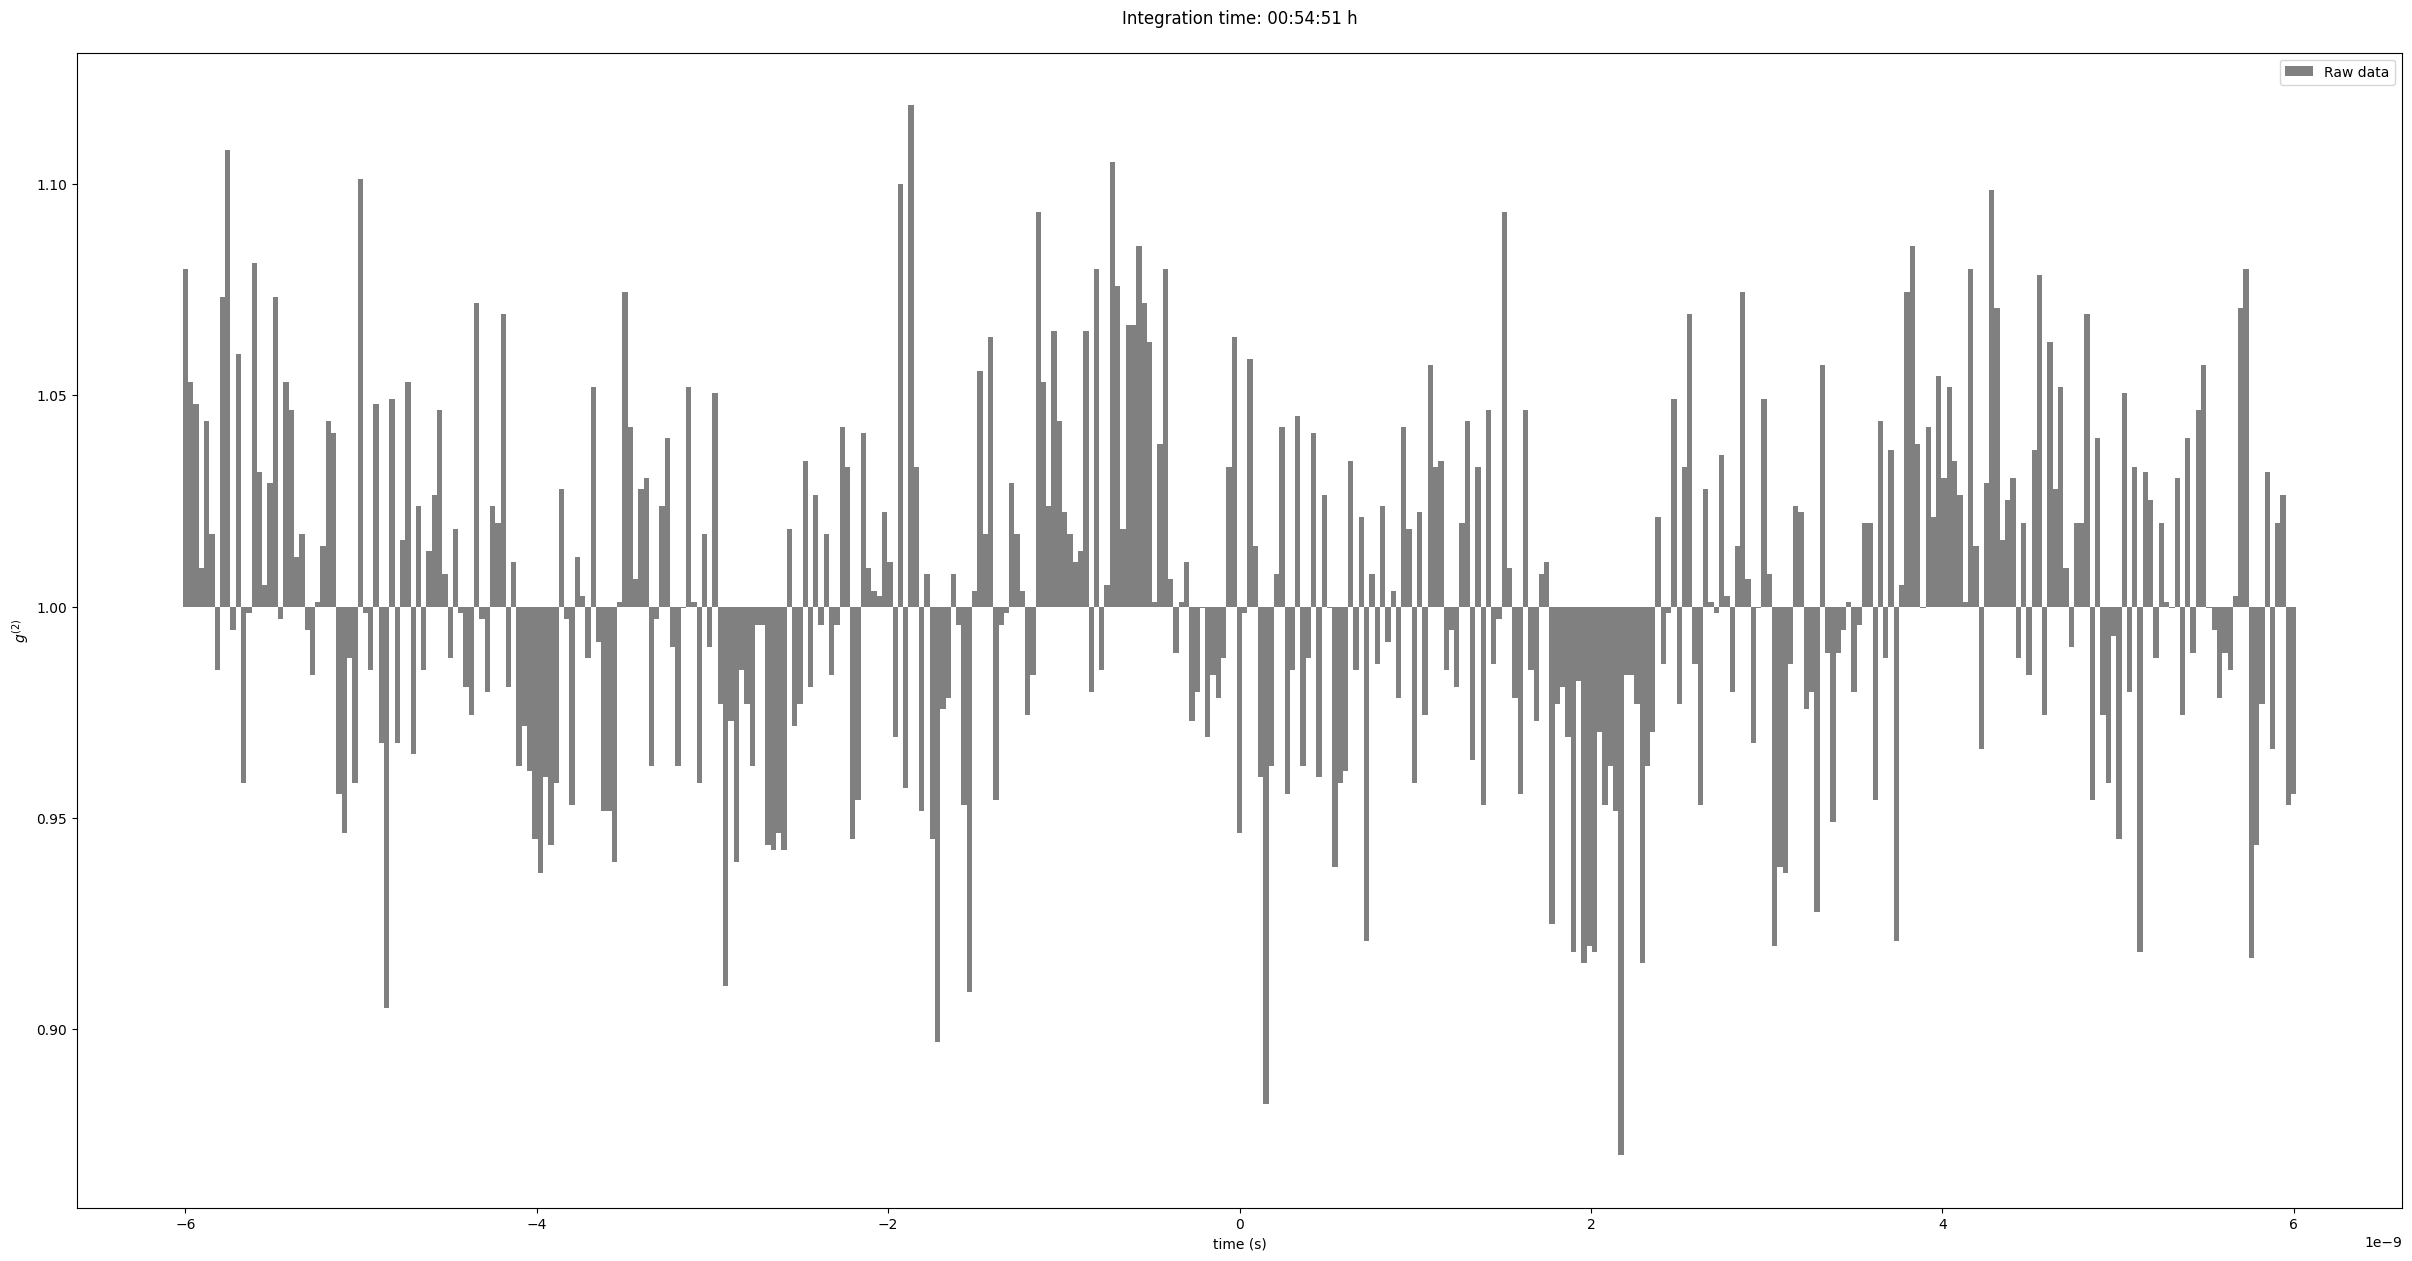

In [16]:
%matplotlib inline
# Skip the comment lines starting with '#' and read the data
g2dataset = pd.read_csv(r"Experiment 2\G2Functions_1.txt", comment='#', sep=';', header=None, names=["T", "G2"])
g2dataset = g2dataset.to_numpy().T
# Get integration time
with open(r"Experiment 2\G2Functions_1.txt") as f:
    lines = f.readlines()
    integration_time = lines[5][17:]
plt.title(f"Integration time: {integration_time}")

T = g2dataset[0]
g2 = g2dataset[1]
print(f"Bin size: {T[1] - T[0]}")
print(f"Bin Count = {len(T)}")

plt.bar(T, g2-1, T[1] - T[0], bottom=1, label="Raw data", color="grey")

print(f"Minimum count of the raw data: {min(g2)}")

plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()

Again just noise

The overnight run failed, so we're doing a 2 hour one this morning

Bin size: 1.0009999999999638e-11
1999
Minimum count of the raw data: 0.740795
New bin size: 6.005999999999783e-11 s


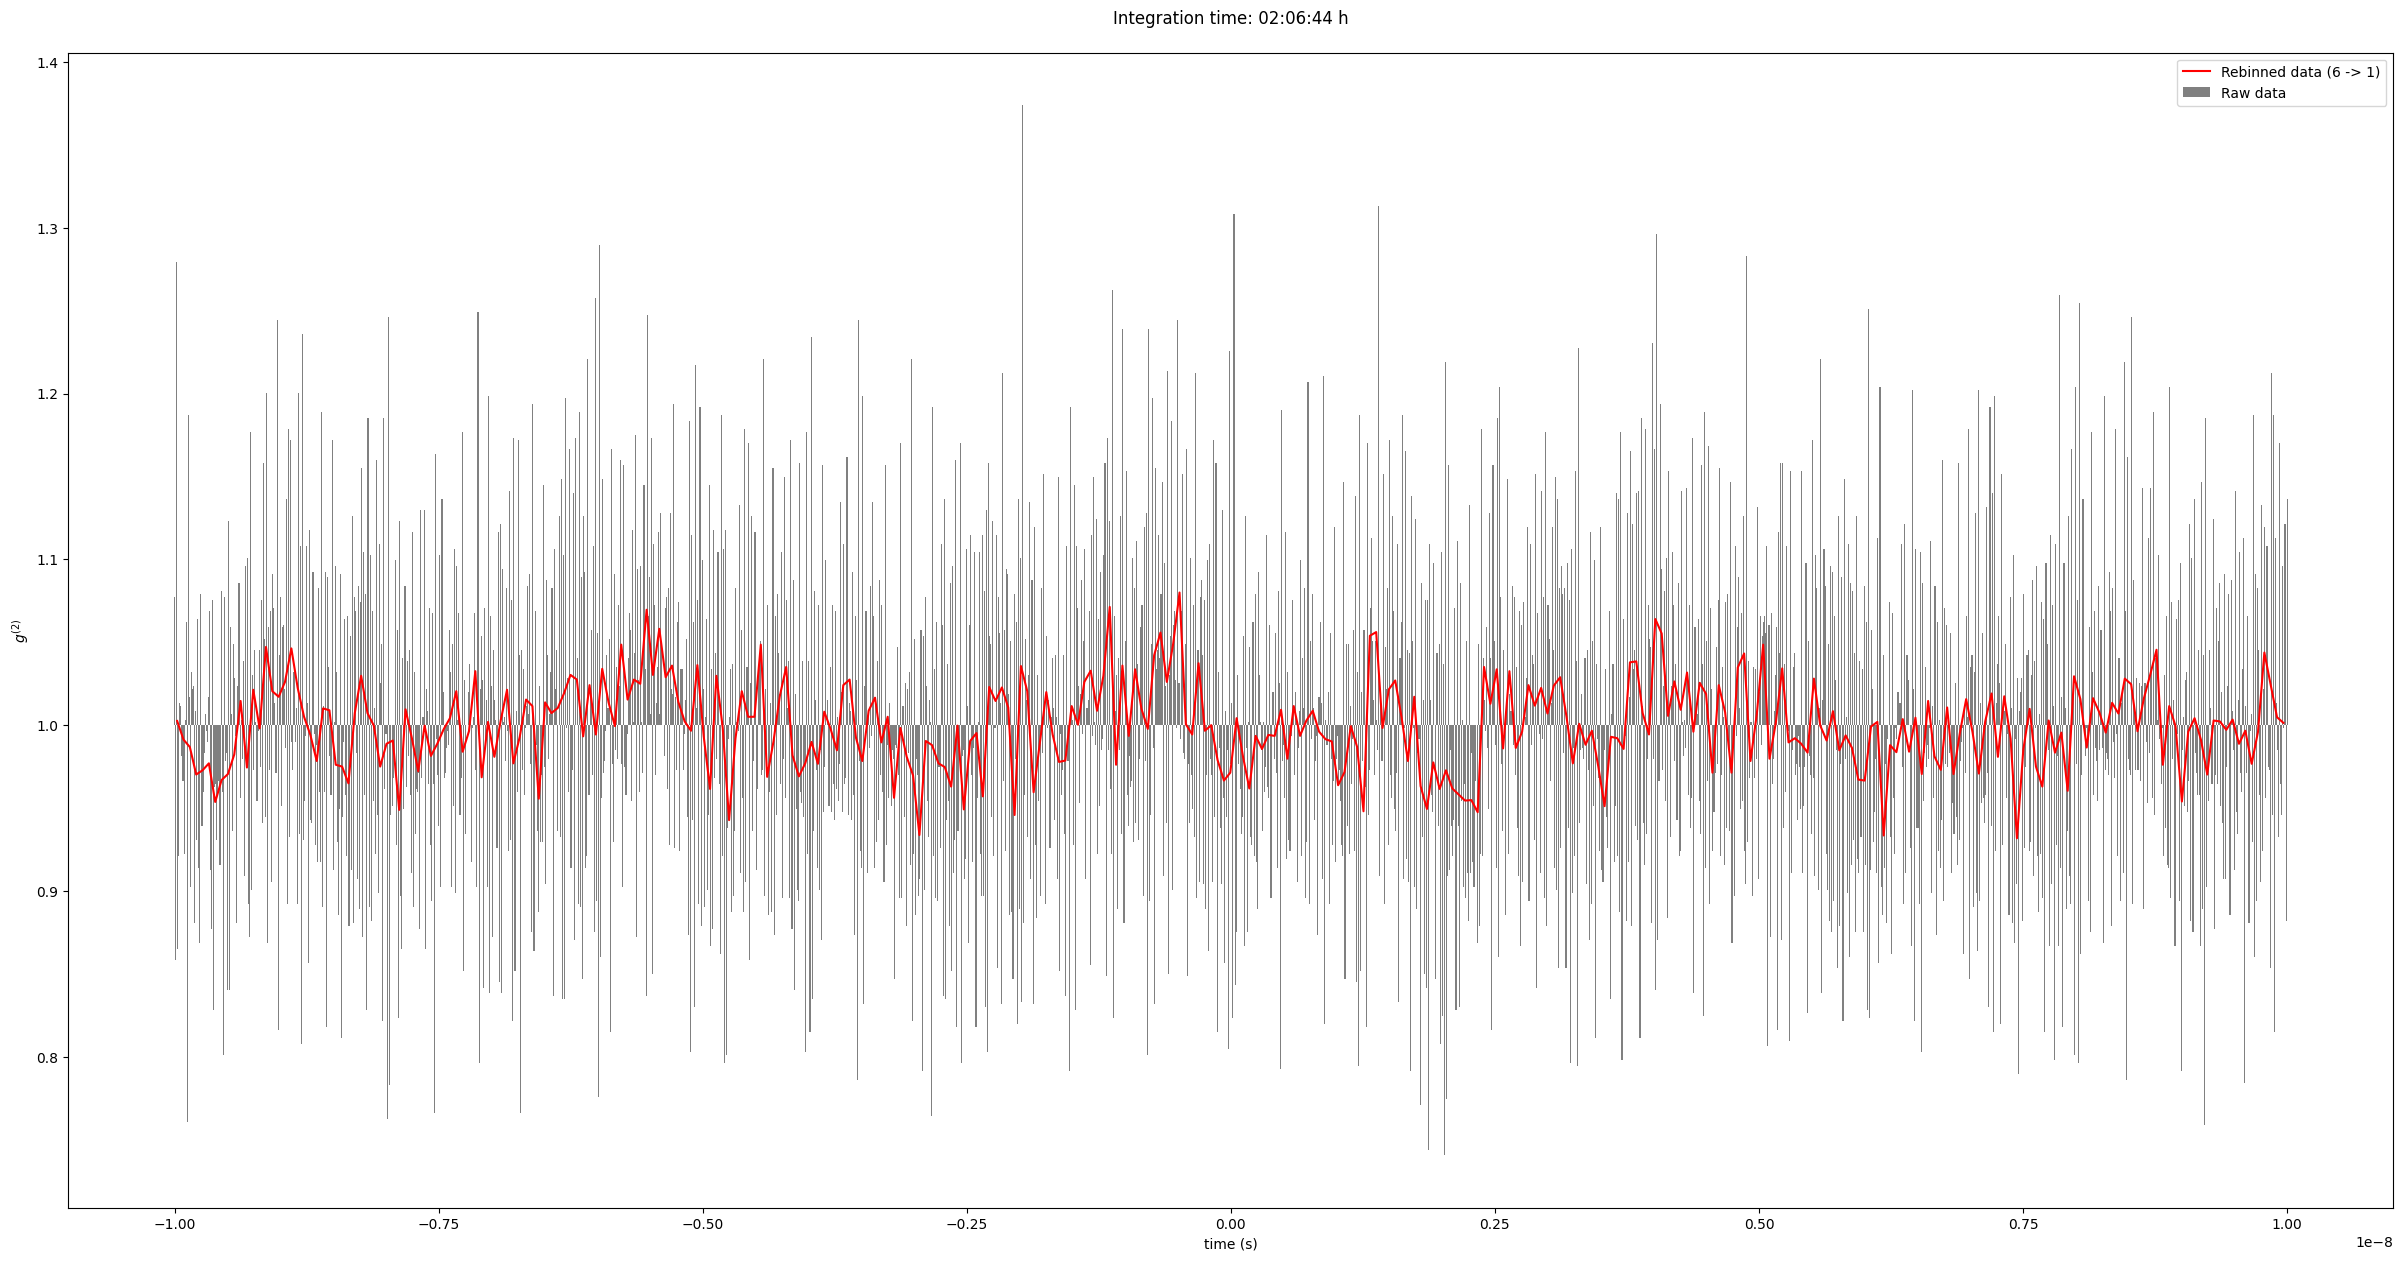

In [14]:
%matplotlib inline
# Skip the comment lines starting with '#' and read the data
g2dataset = pd.read_csv(r"Experiment 2\G2Functions_2.txt", comment='#', sep=';', header=None, names=["T", "G2"])
g2dataset = g2dataset.to_numpy().T
# Get integration time
with open(r"Experiment 2\G2Functions_2.txt") as f:
    lines = f.readlines()
    integration_time = lines[5][17:]
plt.title(f"Integration time: {integration_time}")

T = g2dataset[0]
g2 = g2dataset[1]
print(f"Bin size: {T[1] - T[0]}")
print(len(T))

plt.bar(T, g2-1, T[1] - T[0], bottom=1, label="Raw data", color="grey")

print(f"Minimum count of the raw data: {min(g2)}")

# Rebin data ----------------------------------------------------------
# Rebin to rebin_amount bins
rebin_amount = 6
print(f"New bin size: {rebin_amount*(T[1] - T[0])} s")

# Rebin data
T_rebinned_3 = np.array([sum([T[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(T)-(rebin_amount-1), rebin_amount)])
g2_rebinned_3 = np.array([sum([g2[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(g2)-(rebin_amount-1), rebin_amount)])

plt.plot(T_rebinned_3, g2_rebinned_3, label=f"Rebinned data ({rebin_amount} -> 1)", color="red")


plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()